The notebook is done by : Echrak_Bouafif_Minyar_Benameur_Mohamed_Amine_Staali.
Scrum Master : Eya Methanani .

# **Understanding the dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


In [ ]:
#Upload the DataFrame
df = pd.read_csv('/content/hcvdat0.csv')

df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#print the dimensions of the DataFrame
df.shape

(615, 14)

In [ ]:
#print the columns names of the DataFrame
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

# Fixing Column naming

In [ ]:
#drop column i=unnammed
df.drop("Unnamed: 0", inplace=True, axis= 1)

# Verify the column name change
df.columns


Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

**Interpretation**

We are dropping the "Unnamed: 0" column because it contains redundant information: row indices which are not needed as a separate column.

In [ ]:
# Summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [ ]:
# Summary statistics for numerical and categorical data
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


# Category Types

In [ ]:
# Check unique values in the 'Category' column to understand the labels
print("Unique values in 'Category':", df['Category'].unique())

Unique values in 'Category': ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


**Interpretation**

The target attribute for classification is Category: blood donors vs. Hepatitis C patients (including its progress (Hepatitis C, Fibrosis, Cirrhosis).


In [ ]:

# Replace '0=Blood Donor' and '0s=suspect Blood Donor' with '0=normal' in the 'Category' column
df['Category'] = df['Category'].replace(['0=Blood Donor', '0s=suspect Blood Donor'], '0=normal')

# Verify the changes
print("Unique values in 'Category':", df['Category'].unique())

Unique values in 'Category': ['0=normal' '1=Hepatitis' '2=Fibrosis' '3=Cirrhosis']


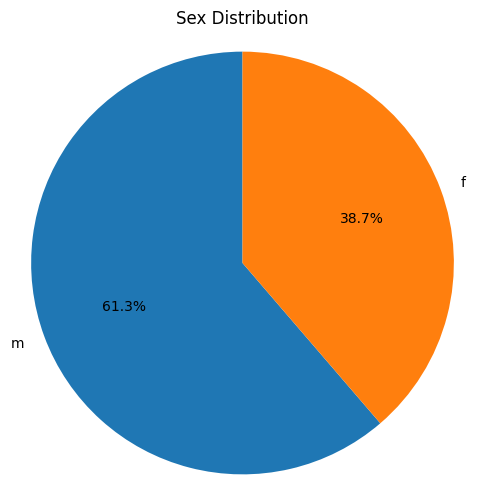

In [ ]:
# Calculate sex distribution
sex_counts = df['Sex'].value_counts()

# Create the circle graph (pie chart)
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

**Interpretation:**

The plot indicates that the dataset contains a higher percentage of male samples compared to female samples.


The pie chart visually represents the proportion of males and females in the dataset.  The larger slice of the pie represents the gender with a higher count. In this case, the larger slice belongs to the male category, which means the majority of the samples belong to the male gender, implying a larger number of male individuals within the dataset.

In [ ]:
def plot_count(df,columns,n_cols,hue):
    '''
    # Function to genear countplot
    df: total data
    columns: category variables
    n_cols: num of cols
    '''
    n_rows = (len(columns) - 1) // n_cols + 1
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(17, 4 * n_rows))
    ax = ax.flatten()

    for i, column in enumerate(columns):
        sns.countplot(data=df, x=column, ax=ax[i],hue=hue)

        # Titles
        ax[i].set_title(f'{column} Counts', fontsize=18)
        ax[i].set_xlabel(None, fontsize=16)
        ax[i].set_ylabel(None, fontsize=16)
        ax[i].tick_params(axis='x', rotation=10)

        for p in ax[i].patches:
            value = int(p.get_height())
            ax[i].annotate(f'{value:.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                           ha='center', va='bottom', fontsize=9)
    ylim_top = ax[i].get_ylim()[1]
    ax[i].set_ylim(top=ylim_top * 1.1)
    for i in range(len(columns), len(ax)):
        ax[i].axis('off')

    # fig.suptitle(plotname, fontsize=25, fontweight='bold')
    plt.tight_layout()
    plt.show()


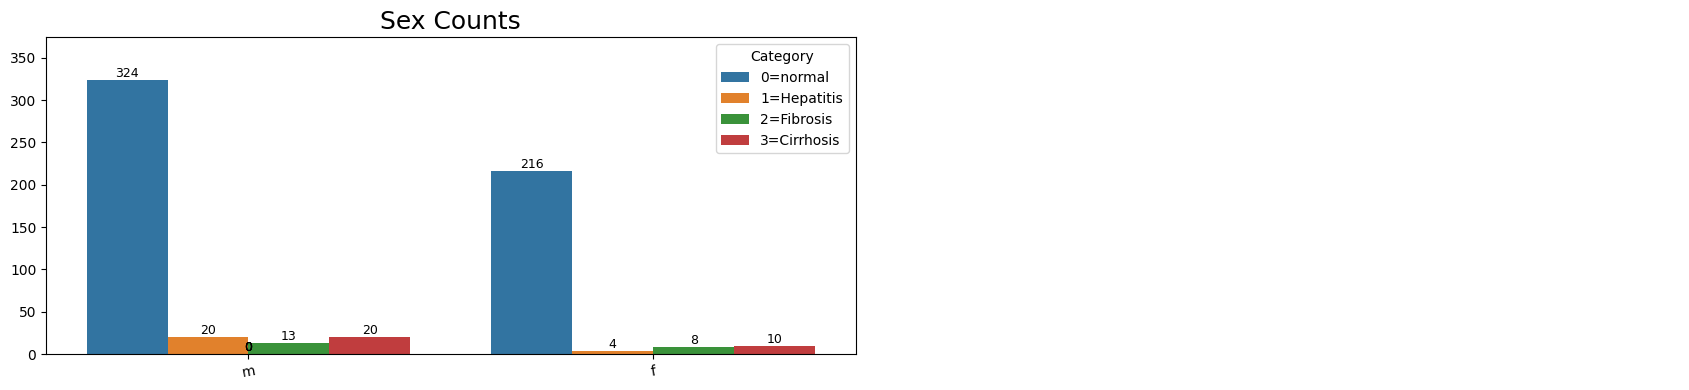

In [ ]:
 plot_count(df, ["Sex"], 2,"Category")

**interpretation:**

the plot shows that there are significantly more male patients with Hepatitis C than females, it suggests that males might be at a higher risk of developing the disease.


By observing the color-coded bars, we can infer how the disease is distributed across different genders within the dataset. It will facilitate the exploration of potential gender-specific correlations with Hepatitis C.

# Age

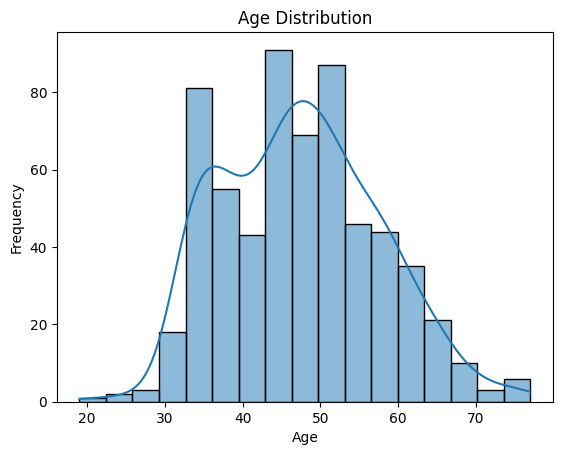

In [ ]:
# Plot for age distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**interpretation:**
The plot shows the distribution of the age of individuals in the dataset.


# Check Missing Values

In [ ]:
# Checking for Missing Values
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


**Interpretation**

Missing Values: columns_missing = [

"ALB"=1,

"ALP"=18,

"ALT"=1,

"CHOL"=10,

"PROT"=1

]


In [ ]:
# Display rows with null values in the DataFrame
print(df[df.isnull().any(axis=1)])

        Category  Age Sex   ALB    ALP    ALT    AST    BIL    CHE  CHOL  \
121     0=normal   43   m  48.6   45.0   10.5   40.5    5.3   7.09   NaN   
319     0=normal   32   f  47.4   52.5   19.1   17.1    4.6  10.19   NaN   
329     0=normal   33   f  42.4  137.2   14.2   13.1    3.4   8.23   NaN   
413     0=normal   46   f  42.9   55.1   15.2   29.8    3.6   8.37   NaN   
424     0=normal   48   f  45.6  107.2   24.4   39.0   13.8   9.77   NaN   
433     0=normal   48   f  46.8   93.3   10.0   23.2    4.3  12.41   NaN   
498     0=normal   57   f  48.4   94.4    2.5   39.6    2.3   8.84   NaN   
540  1=Hepatitis   38   m  45.0   56.3    NaN   33.1    7.0   9.58   6.0   
541  1=Hepatitis   19   m  41.0    NaN   87.0   67.0   12.0   7.55   3.9   
545  1=Hepatitis   29   m  49.0    NaN   53.0   39.0   15.0   8.79   3.6   
546  1=Hepatitis   30   m  45.0    NaN   66.0   45.0   14.0  12.16   6.1   
568   2=Fibrosis   49   m  39.0    NaN  118.0   62.0   10.0   7.28   3.5   
569   2=Fibr

In [ ]:
# Quartiles
quartiles_df = df[numerical_cols].quantile([0.25, 0.5, 0.75]).transpose()
print("\nQuartiles (25%, 50%, 75%) for each feature:\n", quartiles_df)


Quartiles (25%, 50%, 75%) for each feature:
         0.25   0.50    0.75
Age   39.000  47.00  54.000
ALB   38.800  41.95  45.200
ALP   52.500  66.20  80.100
ALT   16.400  23.00  33.075
AST   21.600  25.90  32.900
BIL    5.300   7.30  11.200
CHE    6.935   8.26   9.590
CHOL   4.610   5.30   6.060
CREA  67.000  77.00  88.000
GGT   15.700  23.30  40.200
PROT  69.300  72.20  75.400


In [ ]:
# Interquartile Range (IQR)
iqr_df = quartiles_df[0.75] - quartiles_df[0.25]  # Interquartile Range (IQR)
print("\nInterquartile Range (IQR) for each feature:\n", iqr_df)


Interquartile Range (IQR) for each feature:
 Age     15.000
ALB      6.400
ALP     27.600
ALT     16.675
AST     11.300
BIL      5.900
CHE      2.655
CHOL     1.450
CREA    21.000
GGT     24.500
PROT     6.100
dtype: float64


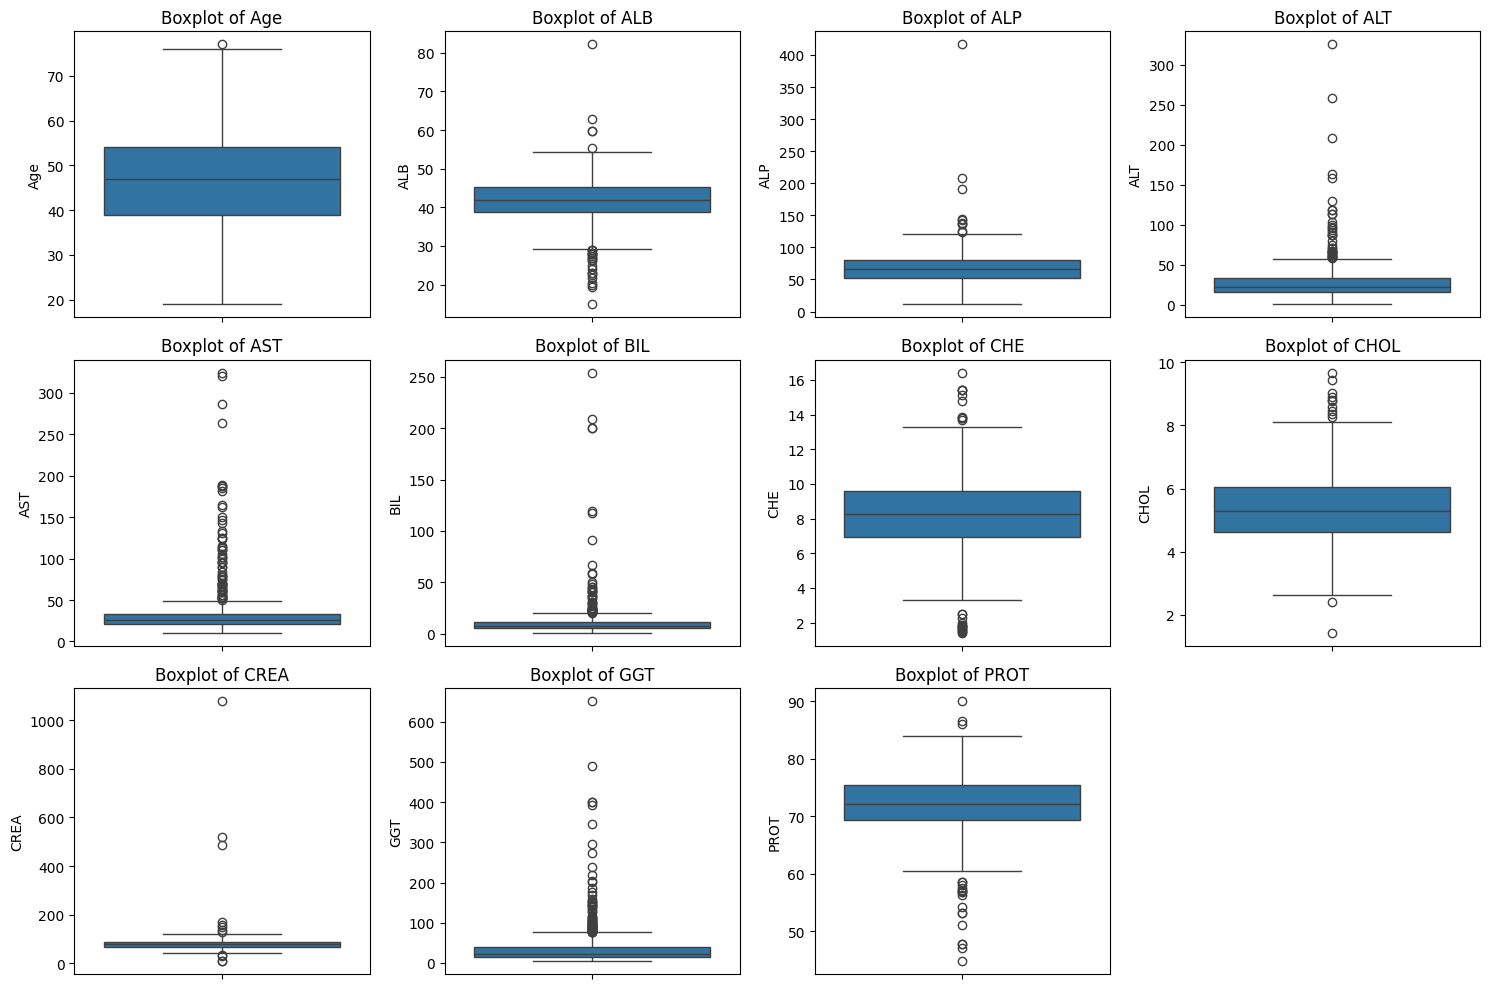

In [ ]:
# Detecting Outliers using Boxplots for numerical columns

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:

# Calculate the upper and lower bounds for outlier detection
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Identify outliers for each numerical column
outliers = {}
for col in numerical_cols:
    lower_bound, upper_bound = detect_outliers_iqr(df[col])
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Handling outliers (replace with median)
for col in numerical_cols:
    lower_bound, upper_bound = detect_outliers_iqr(df[col])
    median_val = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val


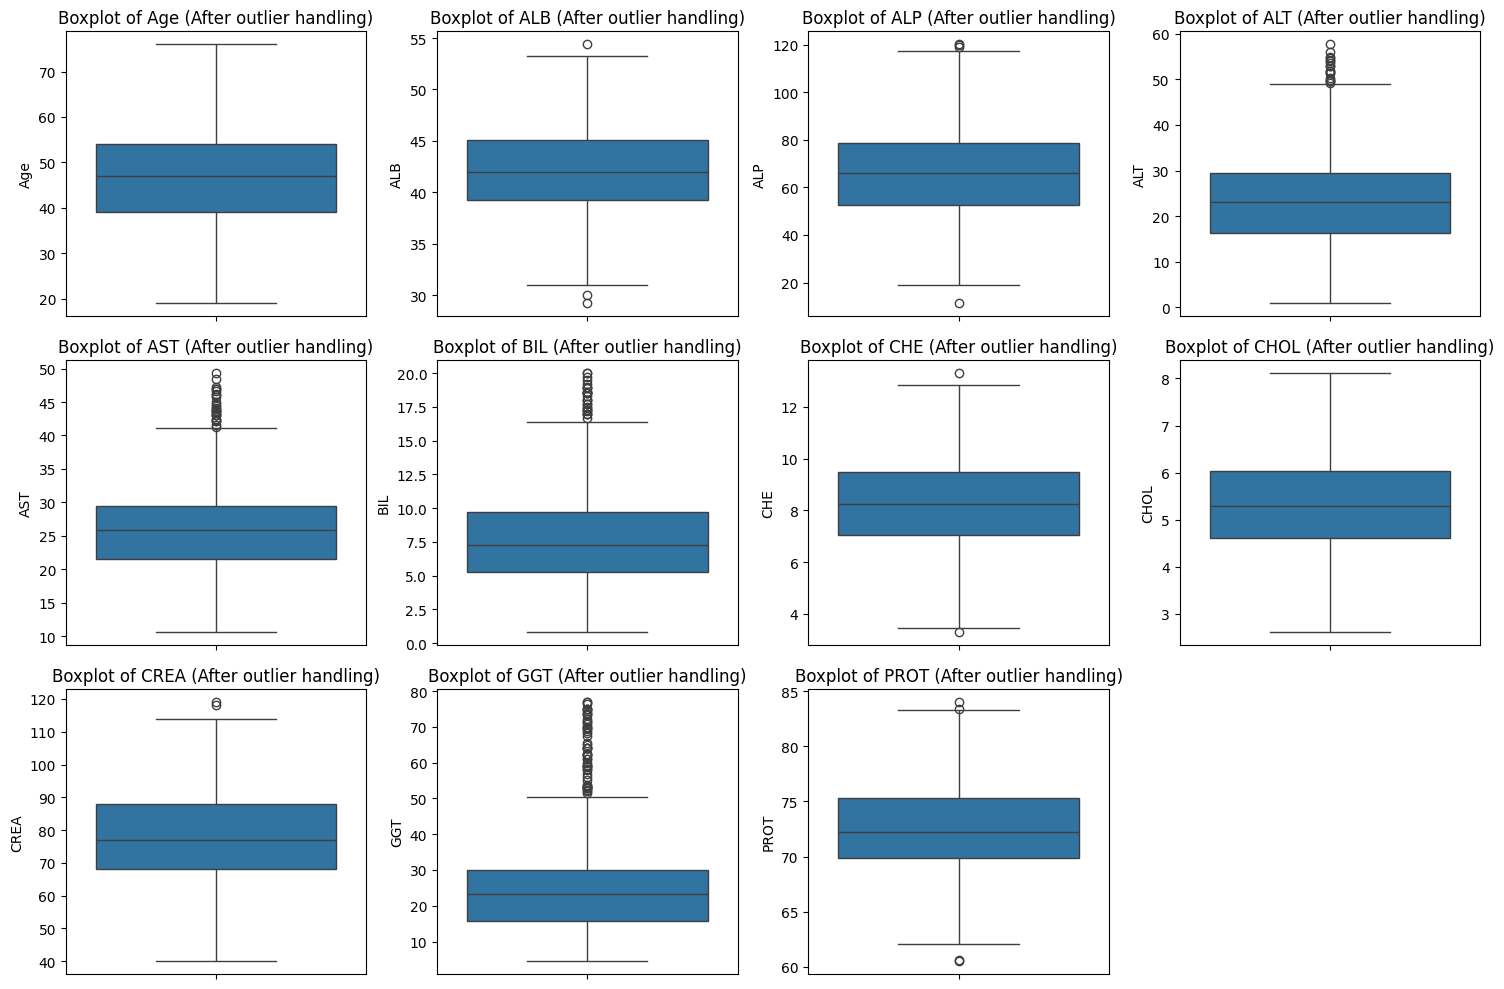

In [ ]:
#Re-plot the boxplots to see the effect
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After outlier handling)')
plt.tight_layout()
plt.show()

**Interpretations**


Outlier Detection with IQR: The code identifies outliers by calculating the Interquartile Range (IQR) to find upper and lower bounds for each numerical column.

Outlier Identification: Outliers for each column are found by comparing values to the calculated bounds and stored in a dictionary for reference.

Outlier Handling: Outliers are replaced with the column’s median, as the median is robust to extreme values, helping to retain data integrity without skewing central values.

In [ ]:
#range
range_df = df[numerical_cols].max() - df[numerical_cols].min()
print("\nRange of each feature:\n", range_df)


Range of each feature:
 Age      57.00
ALB      25.20
ALP     108.90
ALT      56.80
AST      38.70
BIL      19.20
CHE      10.01
CHOL      5.50
CREA     79.00
GGT      72.40
PROT     23.50
dtype: float64


In [ ]:
# Variance
variance_df = df[numerical_cols].var()
print("\nVariance of each feature:\n", variance_df)



Variance of each feature:
 Age      99.676846
ALB      17.783529
ALP     358.528737
ALT     118.059727
AST      46.581936
BIL      14.975007
CHE       3.224866
CHOL      1.039230
CREA    201.960796
GGT     223.436023
PROT     18.116234
dtype: float64


In [ ]:
#Standard Deviation
std_dev_df = df[numerical_cols].std()
print("\nStandard Deviation of each feature:\n", std_dev_df)



Standard Deviation of each feature:
 Age      9.983829
ALB      4.217052
ALP     18.934855
ALT     10.865529
AST      6.825096
BIL      3.869755
CHE      1.795791
CHOL     1.019427
CREA    14.211291
GGT     14.947777
PROT     4.256317
dtype: float64


**Interpretation**

the range , Variance and the Standard Deviation could  indicate

- Feature Spread: A larger range indicates a wider spread of values for a feature, suggesting potentially more diversity in that feature's values.


- Potential Outliers:  A large range could also be an indication of the presence of outliers. In the context of the code, outliers have already been handled by replacing them with the median.

- Feature Scaling: When preparing data for machine learning models, features with very different ranges can impact model performance. Feature scaling techniques (e.g., standardization or normalization) might be applied to address this.



In [ ]:
#skewness
skewness_df = df[numerical_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness of each feature:\n", skewness_df)



Skewness of each feature:
 Age     0.244457
ALB    -0.112895
ALP     0.220492
ALT     0.673518
AST     0.833898
BIL     1.031158
CHE    -0.097553
CHOL    0.110362
CREA    0.316737
GGT     1.528187
PROT    0.050126
dtype: float64


In [ ]:
#kurtosis
kurtosis_df = df[numerical_cols].apply(lambda x: kurtosis(x.dropna()))
print("\nKurtosis of each feature:\n", kurtosis_df)


Kurtosis of each feature:
 Age    -0.439099
ALB    -0.052863
ALP    -0.076504
ALT     0.273270
AST     0.788470
BIL     0.674870
CHE    -0.107611
CHOL   -0.292466
CREA   -0.248249
GGT     2.008489
PROT   -0.083488
dtype: float64


**Interpretation:**

**Skewness:**

Skewness measures the asymmetry of the distribution of data around its mean.


**Kurtosis:**

Kurtosis measures the "tailedness" or "peakedness" of a distribution.

In [ ]:
# Detecting Redundancies - Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


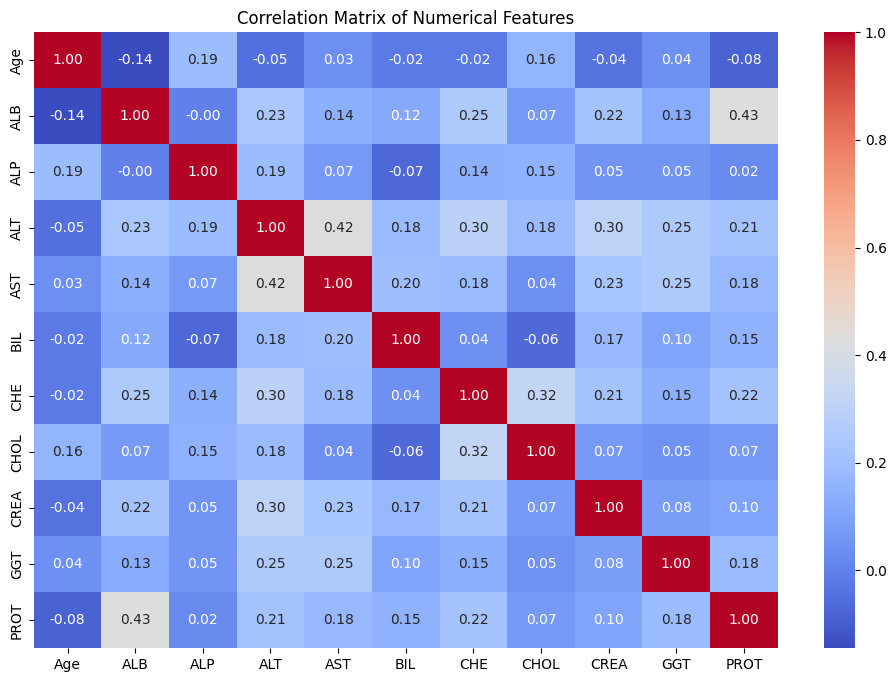

In [ ]:
# Correlation Analysis
# Plot a heatmap to see correlations between numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

**interpretation**
* Correlation Analysis:

A heatmap of the correlation matrix for numerical features highlights any strong positive or negative correlations. This insight is useful for feature selection or reduction.

=> No multicollinearity.

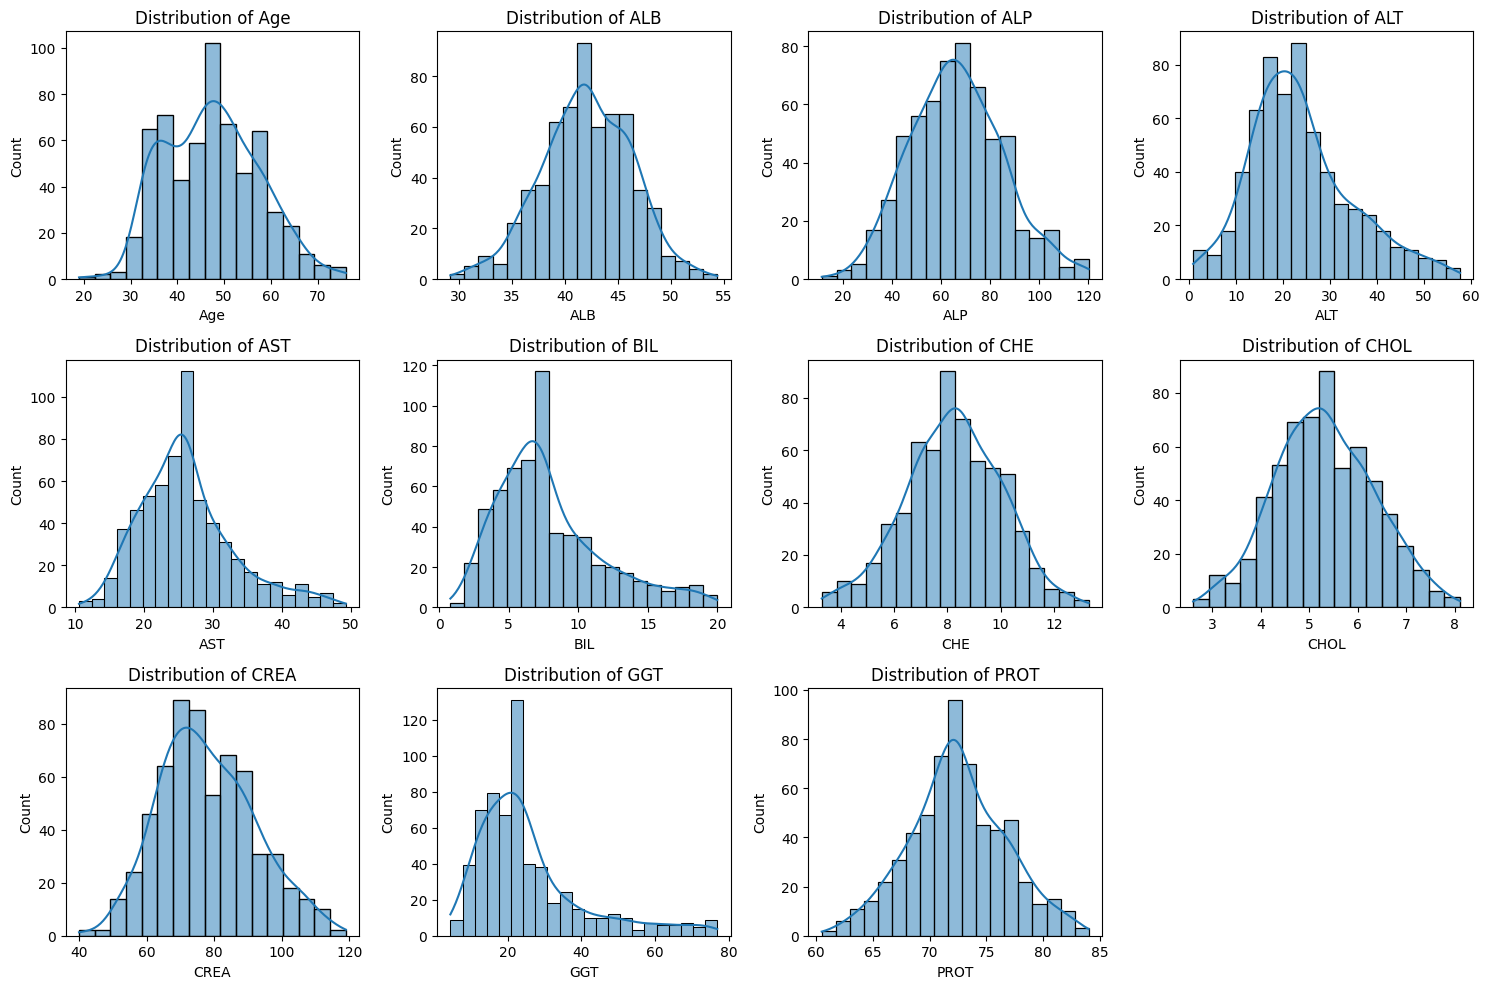

In [ ]:
# Distribution of Numerical Features
# Plot histograms for each numerical feature to see their distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<Axes: >

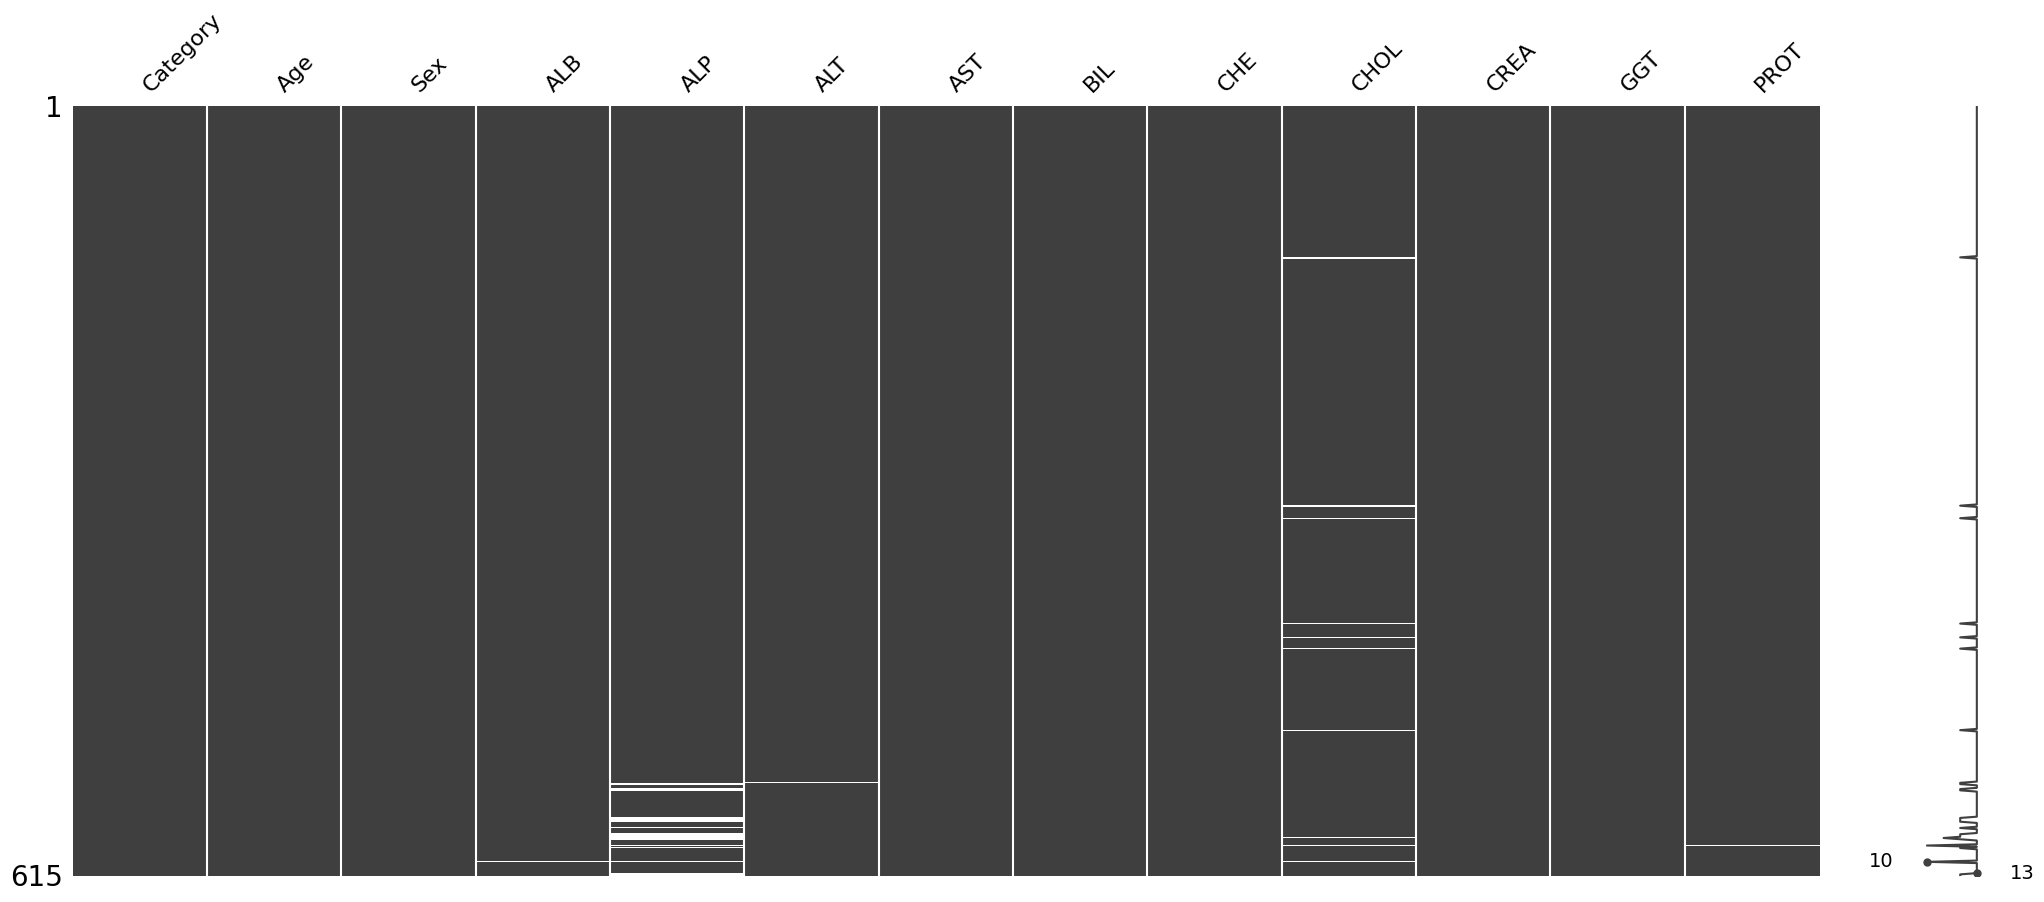

In [ ]:
#Finding reasons for missing data using matrix plot
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data

msno.matrix(df)

 **Interpretation**

 MAR (Missing at Random):

 the missing values appear to be clustered or associated with other variables, this could suggest that the missing data is MAR.

 the columns ALP and CHOL have the biggest number of missing values



In [ ]:


# Define a mapping for each category to a numerical code
category_mapping = {
    '0=normal': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 2,
    '3=Cirrhosis': 3
}

# Apply the mapping to the 'Category' column
df['Category'] = df['Category'].map(category_mapping)

# change the column sex to numerical values
df['Sex'] = df['Sex'].replace({'m':0,"f":1})

# Display the DataFrame to verify the conversion
print(df)

     Category  Age  Sex    ALB    ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0           0   32    0  38.50   52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1           0   32    0  38.50   70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2           0   32    0  46.90   74.7  36.2  25.9   6.1   8.84  5.20   86.0   
3           0   32    0  43.20   52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4           0   32    0  39.20   74.1  32.6  24.8   9.6   9.15  4.32   76.0   
..        ...  ...  ...    ...    ...   ...   ...   ...    ...   ...    ...   
610         3   62    1  32.00   66.2   5.9  25.9   7.3   5.57  6.30   55.7   
611         3   64    1  41.95  102.8   2.9  44.4  20.0   8.26  3.02   63.0   
612         3   64    1  41.95   87.3   3.5  25.9   7.3   8.26  3.63   66.7   
613         3   46    1  33.00    NaN  39.0  25.9  20.0   3.56  4.20   52.0   
614         3   59    1  36.00    NaN  23.0  25.9  12.0   9.07  5.30   67.0   

      GGT  PROT  
0    12.1  69.0  
1    15.6  76.5

<ipython-input-389-6b19262cd299>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'m':0,"f":1})


# **Handle missing values**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [ ]:
# Handle Initial Missing Values (e.g., with mean imputation)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(df.select_dtypes(include=[np.number]))  # Apply only on numerical data
data_imputed = pd.DataFrame(data_imputed, columns=df.select_dtypes(include=[np.number]).columns)


**interpretation**

Our solution is repalcing it with mean value using KNN.

In [ ]:
# Standardize the Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

**interpretation:**

Standardizing data (also known as feature scaling) is a common preprocessing step in data analysis and machine learning. The goal is to transform data features to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Choose components based on explained variance analysis
data_pca = pca.fit_transform(data_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.21618287 0.12990549]


**interpretation**

In our dataset, PCA helps identify and prioritize the attributes (or features) most relevant to our topic by capturing the maximum variance in fewer dimensions. By transforming the original features into principal components, PCA highlights those combinations of attributes that contribute most to the data's structure, emphasizing patterns and relationships that might not be immediately obvious.

In [ ]:
# Apply Clustering (KMeans) to Identify Patterns and Outliers
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters based on data exploration
df['Cluster'] = kmeans.fit_predict(data_pca)

In [ ]:
# Impute Missing Values by Cluster Mean
for cluster in df['Cluster'].unique():
    # Select only the numeric columns to compute the mean
    numeric_columns = df.select_dtypes(include=['number']).columns
    cluster_mean = df.loc[df['Cluster'] == cluster, numeric_columns].mean()

    # Impute missing values with the cluster mean for numeric columns
    for column in numeric_columns:
        df.loc[(df['Cluster'] == cluster) & (df[column].isnull()), column] = cluster_mean[column]

# Display the DataFrame to verify the imputation
print(df)


     Category   Age  Sex    ALB         ALP   ALT   AST   BIL    CHE  CHOL  \
0         0.0  32.0  0.0  38.50   52.500000   7.7  22.1   7.5   6.93  3.23   
1         0.0  32.0  0.0  38.50   70.300000  18.0  24.7   3.9  11.17  4.80   
2         0.0  32.0  0.0  46.90   74.700000  36.2  25.9   6.1   8.84  5.20   
3         0.0  32.0  0.0  43.20   52.000000  30.6  22.6  18.9   7.33  4.74   
4         0.0  32.0  0.0  39.20   74.100000  32.6  24.8   9.6   9.15  4.32   
..        ...   ...  ...    ...         ...   ...   ...   ...    ...   ...   
610       3.0  62.0  1.0  32.00   66.200000   5.9  25.9   7.3   5.57  6.30   
611       3.0  64.0  1.0  41.95  102.800000   2.9  44.4  20.0   8.26  3.02   
612       3.0  64.0  1.0  41.95   87.300000   3.5  25.9   7.3   8.26  3.63   
613       3.0  46.0  1.0  33.00   53.108696  39.0  25.9  20.0   3.56  4.20   
614       3.0  59.0  1.0  36.00   53.108696  23.0  25.9  12.0   9.07  5.30   

      CREA   GGT  PROT  Cluster  
0    106.0  12.1  69.0       

<ipython-input-395-a6bbf3c77fdc>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7058823529411764' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Cluster'] == cluster) & (df[column].isnull()), column] = cluster_mean[column]
<ipython-input-395-a6bbf3c77fdc>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.54117647058823' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Cluster'] == cluster) & (df[column].isnull()), column] = cluster_mean[column]
<ipython-input-395-a6bbf3c77fdc>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25882352941176473' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.


In [ ]:
#Display final dataset with imputed values and outlier labels
print(df.head())

   Category   Age  Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0       0.0  32.0  0.0  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1       0.0  32.0  0.0  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2       0.0  32.0  0.0  46.9  74.7  36.2  25.9   6.1   8.84  5.20   86.0   
3       0.0  32.0  0.0  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4       0.0  32.0  0.0  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  Cluster  
0  12.1  69.0        1  
1  15.6  76.5        2  
2  33.2  79.3        2  
3  33.8  75.7        1  
4  29.9  68.7        2  


In [ ]:
df.isnull()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Cluster
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,False,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False,False
613,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

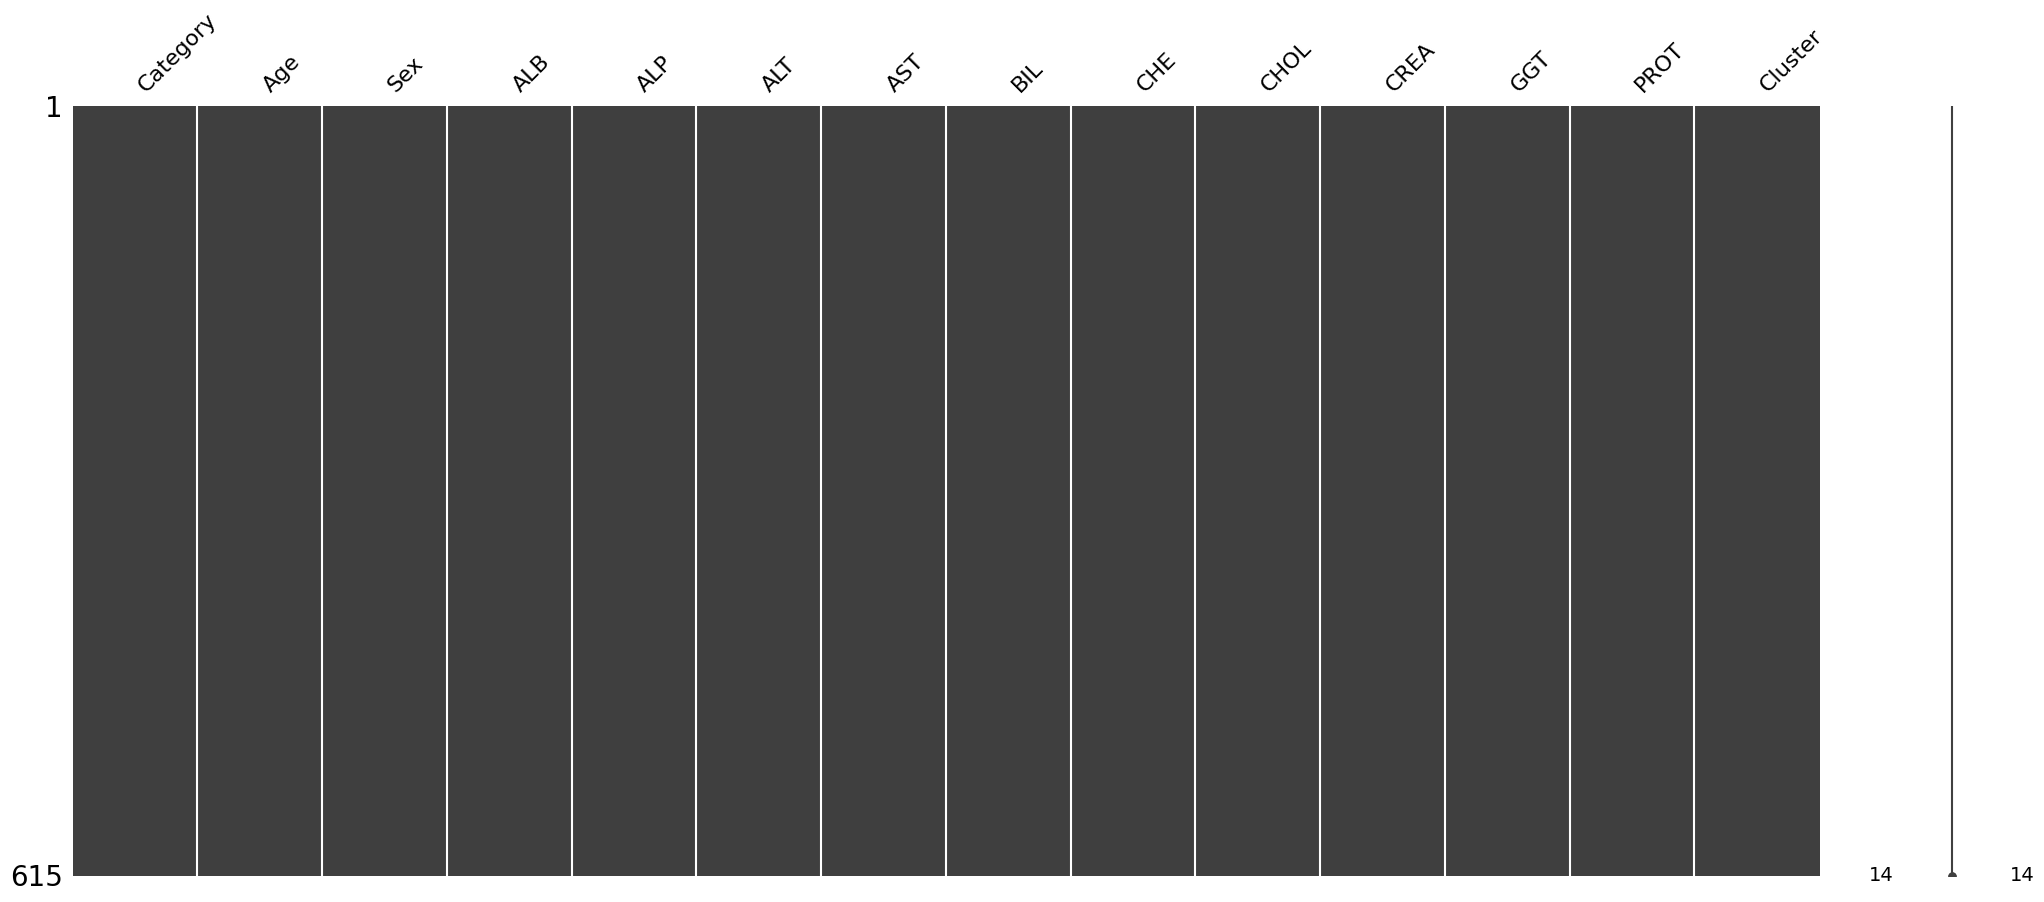

In [ ]:
#Finding reasons for missing data using matrix plot
import missingno as msno #to visualize missing data and get a quick visual summary of the completeness of the data

msno.matrix(df)

#**Random Forest**

In [ ]:
# Random Rain forest model to do the classification of Category

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'df' is your DataFrame with imputed values and 'Category' as the target variable
X = df.drop(['Category', 'Cluster'], axis=1)
y = df['Category']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8699186991869918
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93        99
         1.0       1.00      0.33      0.50         9
         2.0       0.33      0.17      0.22         6
         3.0       1.00      0.44      0.62         9

    accuracy                           0.87       123
   macro avg       0.80      0.49      0.57       123
weighted avg       0.87      0.87      0.84       123



**interpretation**

* **Accuracy (0.87):** The model correctly predicted 87% of the instances in the dataset. It’s a good general measure but may be misleading if classes are imbalanced.

* **Precision:** Measures how many of the positive predictions were correct.

Class 0.0: High precision (0.86), indicating most predictions were accurate.

Class 1.0: Precision is 0, indicating no correct predictions for this class.

Class 2.0, 4.0: Precision of 1.0 shows perfect correctness for these predictions.

Class 3.0: Low precision (0.50), meaning some false positives.
* **Recall:** Measures how many actual positives were captured by the model.

Class 0.0: Perfect recall (1.00), the model captured all positives for this class.

Classes 1.0, 3.0: Low recall, meaning many instances were missed.

Classes 2.0, 4.0: Recall of 0.56 indicates some missed instances.
* **F1-Score:** The harmonic mean of precision and recall; balances both.

Class 0.0: High F1 (0.93), indicating good precision and recall.

Classes 1.0, 3.0: F1 is low, showing poor performance in these classes.

Classes 2.0, 4.0: Moderate F1 (0.71) balances good precision but moderate recall.


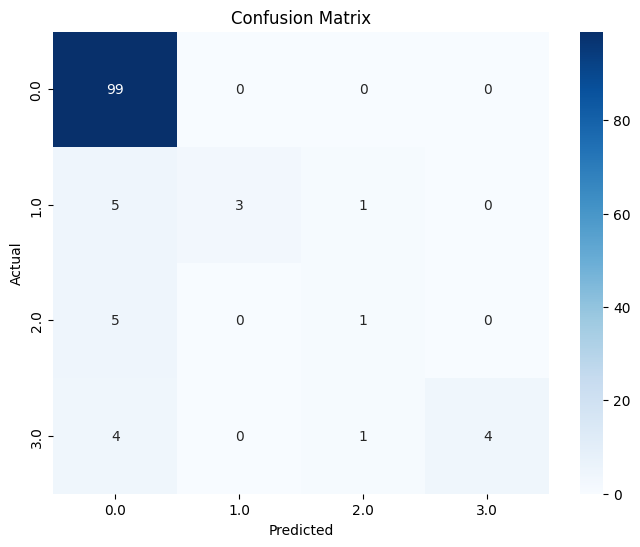

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**interpretation**

The confusion matrix provides a breakdown of the model’s performance by showing the actual vs. predicted classifications for each class. Here’s how to interpret it:

TP = 99
FN = 4
FP = 0
FP = 5 , 5 , 4

In [ ]:
# F1_score
from sklearn.metrics import f1_score

# Calculate the F1-score
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
print(f"F1-score: {f1}")

F1-score: 0.8441793416482786


In [ ]:
#Recall
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' for multi-class
print(f"Recall: {recall}")

Recall: 0.8699186991869918


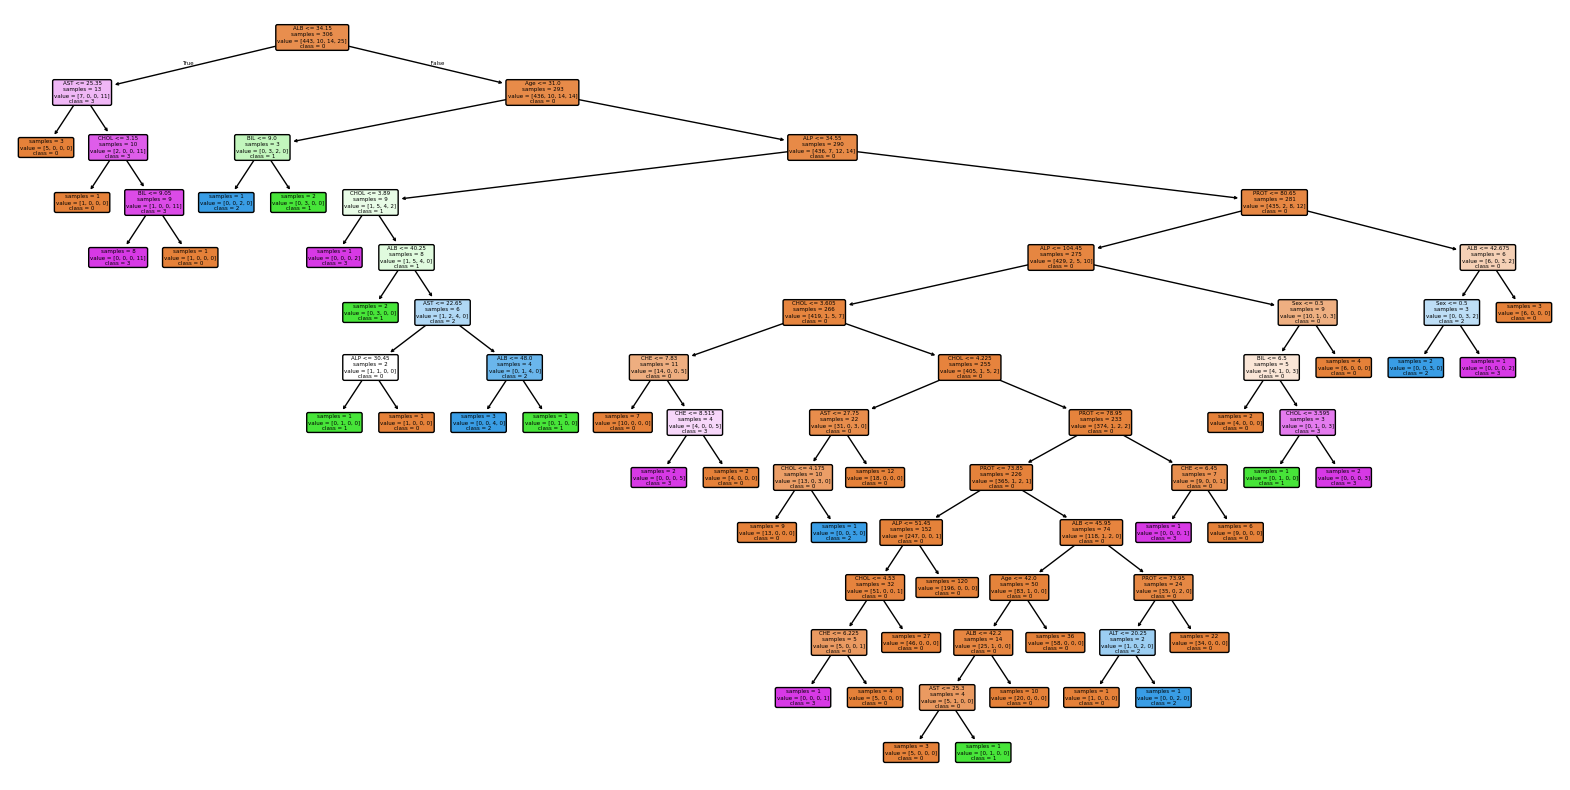

In [ ]:
# a plot to see the complexity of random rain forest model

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Choose a tree from the forest to plot (e.g., the first one)
tree_index = 0
plt.figure(figsize=(20,10)) # Adjust figure size as needed
plot_tree(rf_classifier.estimators_[tree_index],
          feature_names=X.columns,  # Use feature names from your data
          class_names=['0','1','2','3'],
          filled=True, rounded=True, impurity=False)
plt.show()

# **CNN model**

In [ ]:
# CNN model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential(
    [
        keras.Input(shape=(X_train.shape[1], 1)),  # Input shape adjusted for 1D CNN
        layers.Conv1D(64, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(128, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),  # Adjust units as needed
        layers.Dense(8, activation="relu"),
        layers.Dense(4, activation="softmax"),  # Output layer with softmax for multi-class
    ]
)

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Reshape the input data for the CNN
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_split=0.1) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_cnn = np.argmax(model.predict(X_test_reshaped), axis=1)

# Evaluate the CNN model
print(classification_report(y_test, y_pred_cnn))

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.8934 - loss: 0.5072 - val_accuracy: 0.8800 - val_loss: 0.4160
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9062 - loss: 0.3598 - val_accuracy: 0.8800 - val_loss: 0.3893
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8951 - loss: 0.3750 - val_accuracy: 0.8800 - val_loss: 0.3852
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9285 - loss: 0.2498 - val_accuracy: 0.8800 - val_loss: 0.3760
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9199 - loss: 0.2946 - val_accuracy: 0.8800 - val_loss: 0.3581
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9201 - loss: 0.2892 - val_accuracy: 0.8800 - val_loss: 0.3596
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9034 - loss: 0.3385 - val_accuracy: 0.8800 - val_loss: 0.3670
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9171 - loss: 0.2840 - val_accuracy: 0.8800 - val_loss

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**interpretation**

* **Test Loss (0.46):** suggests that the model’s predictions are moderately accurate but could still be improved. This level of error might indicate either room for improvement in model tuning or potential data issues.

* **Test Accuracy (0.85):** 85% shows the model correctly predicted labels for about 79% of the test samples. However, accuracy alone can be misleading, especially when class distribution is imbalanced, as it may not reflect the performance on less common classes.

* **Precision:** for class 0.0 is 0.81, meaning that when the model predicts 0.0, it is correct 81% of the time. Precision for other classes is low (0.00), indicating the model struggles to make accurate positive predictions for these classes.

* **Recall:** for class 0.0 is 1.00, meaning the model correctly identifies all instances of class 0.0. However, recall is 0.00 for classes 1.0, 2.0, and 3.0, indicating it fails to detect any cases of these classes. For class 4.0, recall is 0.11, showing a very low detection rate for this class.

* **F1-Score:** for class 0.0 is 0.89, reflecting a good balance between precision and recall. However, classes 1.0, 2.0, and 3.0 have an F1-score of 0.00, highlighting that the model is ineffective at predicting these classes. Class 4.0 has an F1-score of 0.20, showing limited performance.

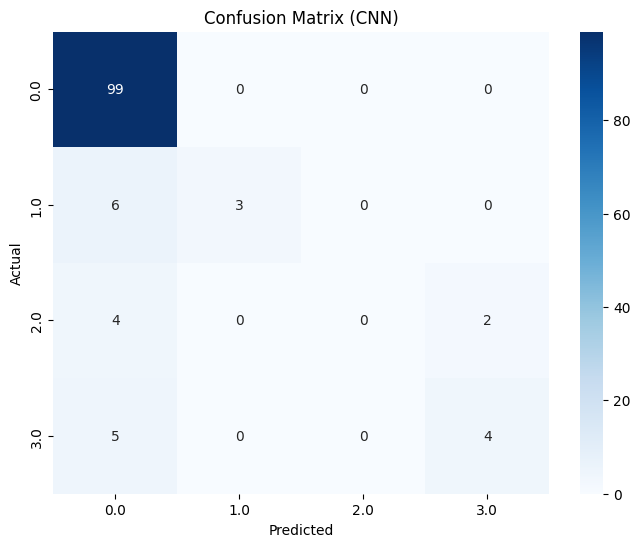

In [ ]:
# Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (CNN)")
plt.show()

In [ ]:
# F1-score for CNN
f1_cnn = f1_score(y_test, y_pred_cnn, average='weighted')
print(f"F1-score (CNN): {f1_cnn}")

F1-score (CNN): 0.8238062521470285


In [ ]:
# Recall for CNN
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')
print(f"Recall (CNN): {recall_cnn}")

Recall (CNN): 0.8617886178861789
